In [1]:
#General imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Astropy imports
import astropy.cosmology as Cosmology
from astropy import units as u 
from astropy import constants as const
from astropy.coordinates import SkyCoord

#Own code
from GOALS_dataframe.analytic_neutrino_flux import *



In [2]:
df = pd.read_csv('GOALS_dataframe/dataframe')

The factor G = 0.5 in the supernova rate is already taken into account here

In [3]:
Ee= 1e3

Arp220_1 = Flux(Ee, 250, 500, 1000,150, 4.0, 1e8, 2.50,87.9)
Arp220_2 = Flux(Ee, 250, 500, 1000,150, 4.48, 1e8, 2.50,87.9)
Arp299_1 = Flux(Ee, 250, 500, 1000,150, 4.0, 1e8, 0.26,50.7)
Arp299_2 = Flux(Ee, 250, 500, 1000,150, 4.11, 1e8,0.26,50.7)
NGC2146_1 = Flux(Ee, 250, 500, 1000,150, 4.0, 1e8, 0.16,17.5)
NGC2146_2 = Flux(Ee, 250, 500, 1000,150, 4.27, 1e8,0.16,17.5)
NGC1068_1 = Flux(Ee, 250, 500, 1000,150, 4.00, 1e8, 0.56*0.5,15.9)
NGC1068_2 = Flux(Ee, 250, 500, 1000,150, 4.52, 1e8 ,0.56*0.5,15.9)


In [4]:
Arp220_1*1e-3

3.5721452475864206e-14

In [5]:
Dec_all = df['Dec'].to_numpy('str')
RA_all = df['RA'].to_numpy('str')
c = [SkyCoord(i,j) for i,j in zip(RA_all,Dec_all)]

In [6]:
df_irg=  df[(df['log(LIR)'] < 11)  ]
df_lirg = df[(df['log(LIR)']>= 11) & (df['log(LIR)'] < 12) ]
df_ulirg = df[(df['log(LIR)']>= 12)  ]


In [7]:
Dec_irg = df_irg['Dec'].to_numpy('str')
Dec_lirg = df_lirg['Dec'].to_numpy('str')
Dec_ulirg = df_ulirg['Dec'].to_numpy('str')

RA_irg = df_irg['RA'].to_numpy('str')
RA_lirg = df_lirg['RA'].to_numpy('str')
RA_ulirg = df_ulirg['RA'].to_numpy('str')

FTeV_irg = df_irg['Flux(TeV) [GeV cm$^{-2}$ s$^{-1}$]'].to_numpy('float')
FTeV_lirg = df_lirg['Flux(TeV) [GeV cm$^{-2}$ s$^{-1}$]'].to_numpy('float')
FTeV_ulirg = df_ulirg['Flux(TeV) [GeV cm$^{-2}$ s$^{-1}$]'].to_numpy('float')

c_irg = [SkyCoord(i,j) for i,j in zip(RA_irg,Dec_irg)]
c_lirg = [SkyCoord(i,j) for i,j in zip(RA_lirg,Dec_lirg)]
c_ulirg = [SkyCoord(i,j) for i,j in zip(RA_ulirg,Dec_ulirg)]

c_rad_sin_irg = np.sin([i.dec.rad for i in c_irg  ])
c_rad_sin_lirg = np.sin([i.dec.rad for i in c_lirg  ])
c_rad_sin_ulirg = np.sin([i.dec.rad for i in c_ulirg  ])

AGNfracs_irg = df_irg['AGNbol'].to_numpy()
AGNfracs_lirg = df_lirg['AGNbol'].to_numpy()
AGNfracs_ulirg = df_ulirg['AGNbol'].to_numpy()



N = df['Name'].to_numpy('str')

In [8]:
Sindec_IceCube_sens = np.loadtxt("IceCube_sensitivity/sindec_10years")
Flux_IceCube_sens = np.loadtxt("IceCube_sensitivity/Fluxsens_10years")

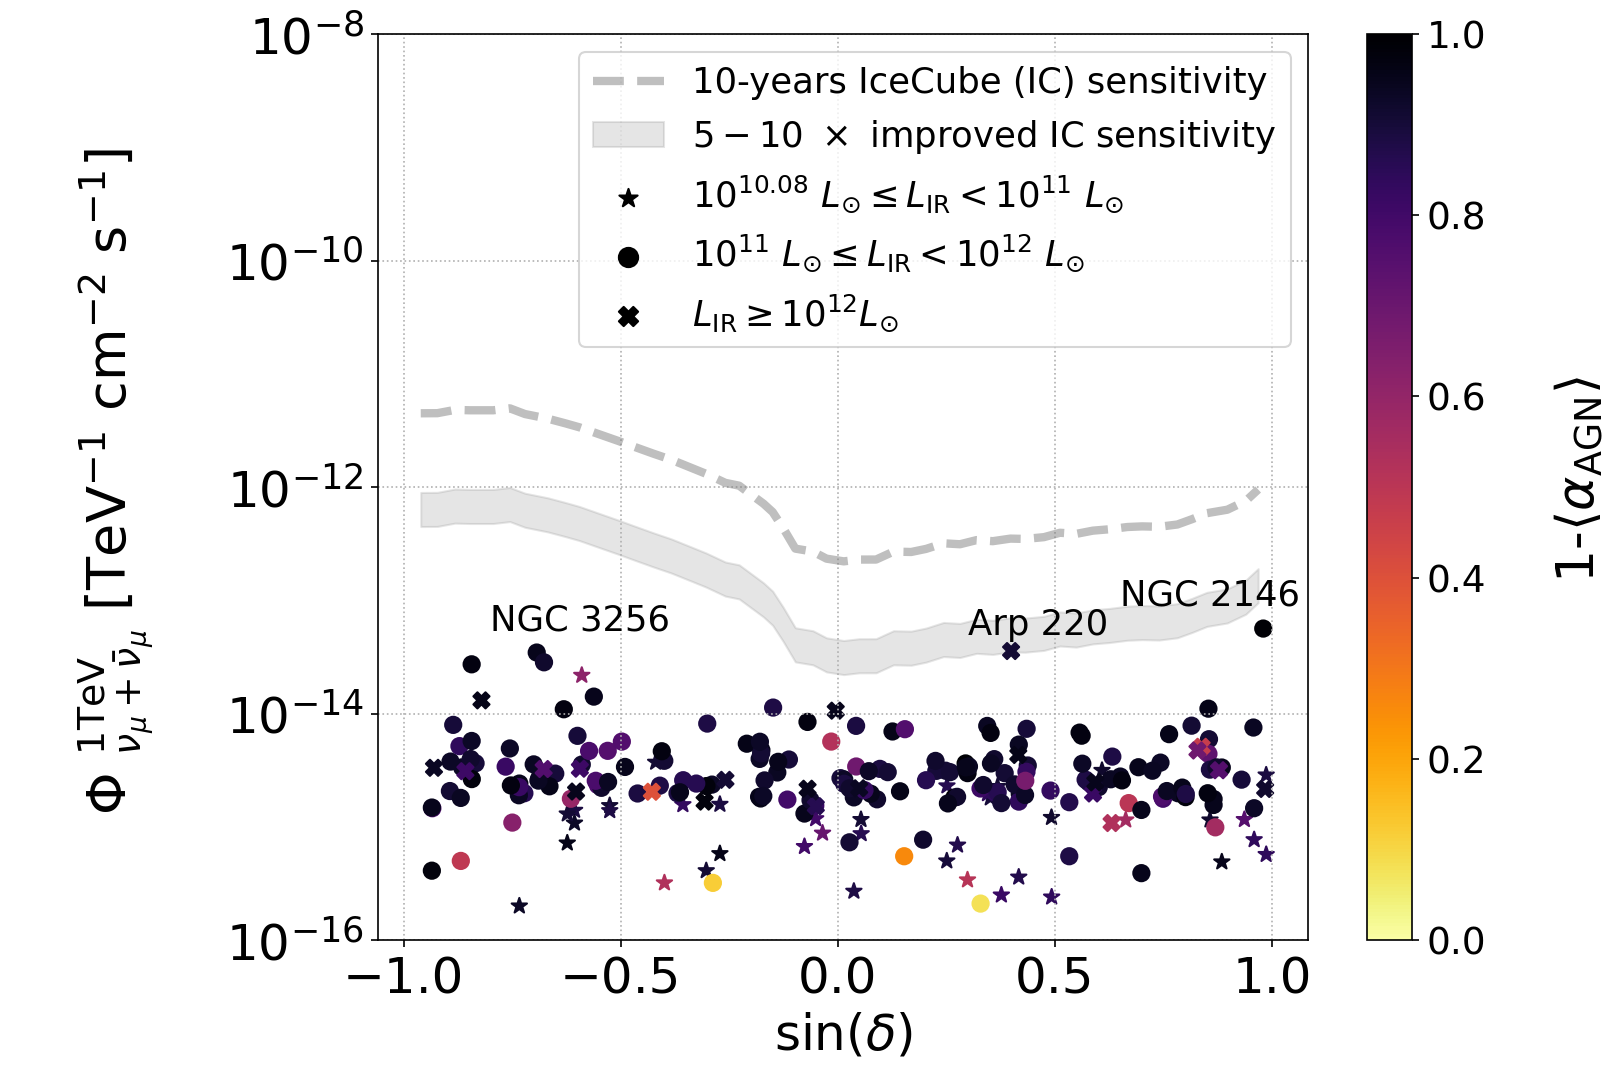

In [9]:
plt.figure(figsize=(10,8), dpi= 150, facecolor='w', edgecolor='k')
plt.grid(ls = 'dotted')
NGC1068_dec = -0.013281 #deg
plt.plot(Sindec_IceCube_sens,Flux_IceCube_sens, label = '10-years IceCube (IC) sensitivity',linewidth = 4, 
         color = 'grey', ls = 'dashed',alpha = 0.5)
plt.fill_between(Sindec_IceCube_sens,Flux_IceCube_sens/5,Flux_IceCube_sens/10,
                 color='grey',alpha = 0.2,label = '$5-10~\\times$ improved IC sensitivity')


NGC1068_sindec = np.sin(np.deg2rad(NGC1068_dec))

#plt.scatter(NGC1068_sindec,NGC1068_1*(1e3/pow(1e3,2)),vmin=0,vmax=1 , marker = 'o',c = (1-0),cmap = "turbo_r",s=60)
#plt.text(NGC1068_sindec+0.05,NGC1068_1*(1e3/pow(1e3,2)), s= 'NGC 1068', fontsize = 18)


cmap = 'inferno_r'#turbo_r
plt.scatter(c_rad_sin_irg,FTeV_irg*(1e3/pow(1e3,2)),vmin=0,vmax=1 ,marker = '*', 
            c = (1-AGNfracs_irg),cmap = cmap, label = '$ 10^{10.08}~L_{\odot} \leq L_{\mathrm{IR}} < 10^{11}~L_{\odot}$',s=60)
plt.scatter(c_rad_sin_lirg,FTeV_lirg*(1e3/pow(1e3,2)),vmin=0,vmax=1 , marker = 'o',
            c = (1-AGNfracs_lirg),cmap = cmap, label = '$10^{11}~L_{\odot} \leq L_{\mathrm{IR}} < 10^{12}~L_{\odot}$', s=60)
plt.scatter(c_rad_sin_ulirg,FTeV_ulirg*(1e3/pow(1e3,2)), vmin = 0, vmax = 1 ,marker='X',
            c = (1-AGNfracs_ulirg),cmap = cmap, label = '$L_{\mathrm{IR}} \geq 10^{12} L_{\odot}$', s= 60)

plt.text(0.30,5e-14, s= 'Arp 220',fontsize = 17)


plt.text(0.65, 9e-14, s= 'NGC 2146',fontsize = 17)
plt.text(-0.80,5.5e-14,s = 'NGC 3256',fontsize = 17)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18) 


#plt.ylim(1e-16,5e-9)
plt.ylim(1e-16,1e-8)
plt.yscale('log')
plt.xlabel('$\sin(\\delta$)',fontsize = 24)
plt.ylabel('\n $\\Phi~^{\mathrm{1TeV}}_{\\nu_\\mu+\\bar{\\nu}_\mu }$ [TeV$^{-1}$ cm$^{-2}$ s$^{-1}$] \n', fontsize = 26)
plt.yticks(fontsize = 24)
plt.xticks([-1.00, -0.50 , 0.0, 0.50, 1.00 ],fontsize = 24)
cb.set_label(label = '\n 1-$\\langle \\alpha_{\\mathrm{AGN}} \\rangle$', fontsize = 25)
lgnd = plt.legend(fontsize = 17)
ax = plt.gca()


lgnd.legendHandles[2]._sizes = [85]
lgnd.legendHandles[2].set_color('k')

lgnd.legendHandles[3]._sizes = [85]
lgnd.legendHandles[3].set_color('k')

lgnd.legendHandles[4]._sizes = [85]
lgnd.legendHandles[4].set_color('k')

plt.savefig("./Figures/fluxsindecpaper_v2.pdf",bbox_inches="tight")



In [10]:
for i in np.arange(0,1,0.01):
    ngc1068_flux = Flux(1e3, 200, 500, 1000,150, 4.0, 1e8, (1-i)*0.51,15.9)
    ngc2146_flux = Flux(1e3, 200, 500, 1000,150, 4.0, 1e8, 0.28,17.5)
    if ngc1068_flux < ngc2146_flux:
        print("For alpha_AGN = ", i, " NGC1068 shows the strongest neutrino flux")
        break
    

For alpha_AGN =  0.55  NGC1068 shows the strongest neutrino flux


In [11]:
Arp220_dec = 23.503139 #deg
Arp220_sindec = np.sin(np.deg2rad(Arp220_dec))
Arp299_dec = 58.561944 #deg
Arp299_sindec = np.sin(np.deg2rad(Arp299_dec))
NGC1068_dec = -0.013281 #deg
NGC1068_sindec = np.sin(np.deg2rad(NGC1068_dec))
NGC2146_dec = 78.357028 #deg
NGC2146_sindec = np.sin(np.deg2rad(NGC2146_dec))

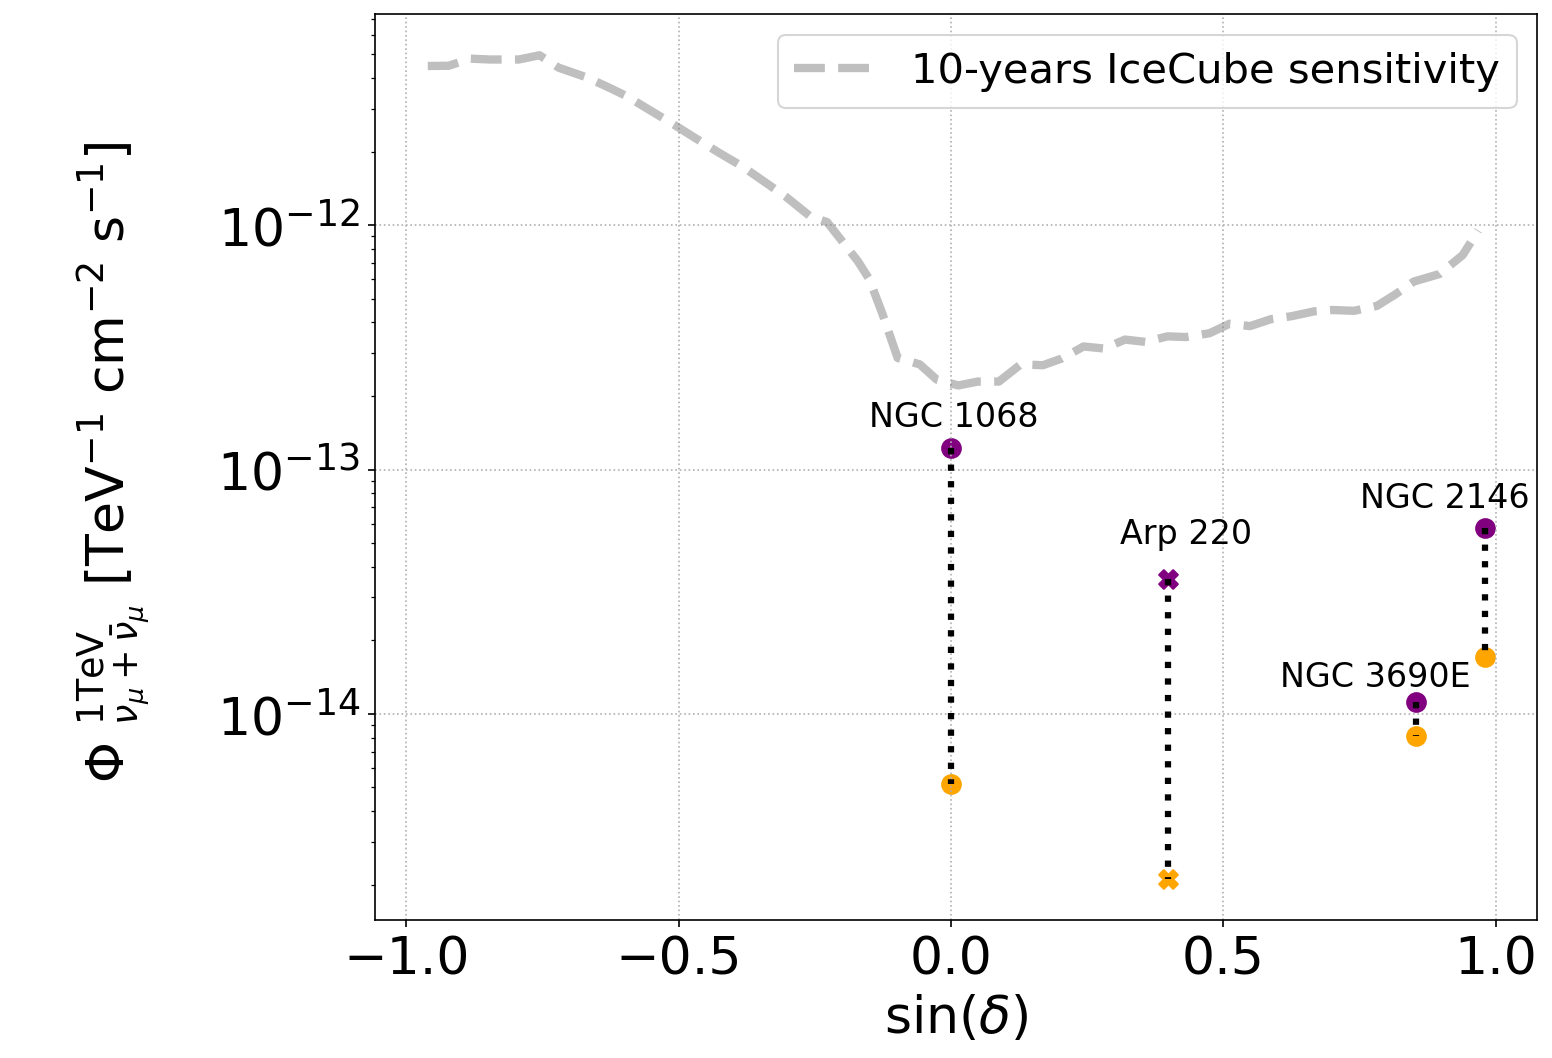

In [12]:

plt.figure(figsize=(10,8), dpi= 150, facecolor='w', edgecolor='k')

plt.scatter(Arp220_sindec, Arp220_1*(1e3/pow(1e3,2)), marker = 'X', c= 'purple', s = 80)
plt.vlines(Arp220_sindec, ymin = Arp220_1*(1e3/pow(1e3,2)), ymax= Arp220_2*(1e3/pow(1e3,2)),linestyle = 'dotted',linewidth =3, color= 'k')
plt.scatter(Arp220_sindec, Arp220_2*(1e3/pow(1e3,2)),marker = 'X', c= 'orange',s = 80)

plt.scatter(Arp299_sindec, Arp299_1*(1e3/pow(1e3,2)),marker = 'o', c= 'purple', s= 80)
plt.vlines(Arp299_sindec, ymin = Arp299_1*(1e3/pow(1e3,2)), ymax= Arp299_2*(1e3/pow(1e3,2)),linestyle = 'dotted',linewidth =3, color= 'k')
plt.scatter(Arp299_sindec, Arp299_2*(1e3/pow(1e3,2)),marker = 'o', c= 'orange', s= 80)


plt.scatter(NGC2146_sindec,NGC2146_1*(1e3/pow(1e3,2)), marker =  'o', c= 'purple',s = 80)
plt.vlines(NGC2146_sindec,ymin = NGC2146_1*(1e3/pow(1e3,2)), ymax = NGC2146_2*(1e3/pow(1e3,2)),linestyle = 'dotted',linewidth =3, color= 'k')
plt.scatter(NGC2146_sindec,NGC2146_2*(1e3/pow(1e3,2)),marker = 'o', c= 'orange', s= 80)

plt.scatter(NGC1068_sindec,NGC1068_1*(1e3/pow(1e3,2)),marker= 'o',c = 'purple', s= 80)
plt.vlines(NGC1068_sindec,ymin = NGC1068_1*(1e3/pow(1e3,2)), ymax = NGC1068_2*(1e3/pow(1e3,2)),linewidth =3, linestyle = 'dotted',color= 'k')
plt.scatter(NGC1068_sindec,NGC1068_2*(1e3/pow(1e3,2)),marker= 'o',c = 'orange', s= 80)


plt.grid(ls = 'dotted')
plt.text(0.31, 5e-14, s= 'Arp 220',fontsize = 16)
plt.text(0.75, 7e-14, s= 'NGC 2146',fontsize = 16)
plt.text(-0.15, 1.5e-13, s= 'NGC 1068', fontsize = 16)

plt.text(Arp299_sindec-0.25, 1.3e-14, s= 'NGC 3690E',fontsize = 16)


plt.plot(Sindec_IceCube_sens,Flux_IceCube_sens, label = '10-years IceCube sensitivity',linewidth = 4, 
         color = 'grey', ls = 'dashed',alpha = 0.5)
#plt.plot(Sindec_IceCube_sens,Flux_IceCube_sens/5, label = '10-years IceCube sensitivity $\\times~5$',linewidth = 4, 
#         color = 'grey', ls = '-',alpha = 0.5)

plt.yscale('log')
plt.xlabel('$\sin(\\delta$)',fontsize = 25)
plt.ylabel('\n $\\Phi~^{\mathrm{1TeV}}_{\\nu_\\mu + \\bar{\\nu}_\mu}$ [TeV$^{-1}$ cm$^{-2}$ s$^{-1}$] \n', fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks([-1.00, -0.50 ,0.0, 0.50, 1.00 ],fontsize = 25)
cb.set_label(label = '\n $\\langle \\alpha_{\\mathrm{AGN}} \\rangle$',weight='bold', fontsize = 24)
plt.legend(fontsize = 20)
plt.savefig("./Figures/Persource_variablegamma.pdf",bbox_inches="tight")




# Sanity checks

We can also compare our code to the results found in [0], which takes a similar approach. For Arp 220 in particular we find:

In [13]:
def nism(SFR): 
    return 175*pow(SFR,2/3)

Flux(1e3,250,500,nism(740),100,4.66,1e8,740/100,77)*(1e3/pow(1e3,2))

1.989112698641121e-15

NGC 2146:

In [14]:
def nism(SFR): 
    return 175*pow(SFR,2/3)

Flux(1e3,250,500,nism(15),100,4.5,1e8,15/100,17)*(1e3/pow(1e3,2))

2.7036921918315397e-15

which is close enough to the result shown in their Figure 1. [0]: https://arxiv.org/pdf/2106.13248.pdf